<a href="https://colab.research.google.com/github/alenadpeethala1/resumeanalysisdesigner/blob/main/(Not_Final)_Practice_Designer_Model_for_Alena's_Resume_Analysis_Project_(Summer_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Alena's Final Resume Analysis Project

Goal: The goal of this project is to develop a tool that essentially analyzes resumes and assesses their suitability for a certain field. For now, I have installed some packages and libraries, imported a resume dataset from Kaggle, and am now playing around with TF-IDF and Word Clouds for Keyword Extraction and building word clouds

# **Initial Installations**

In [3]:
!pip install pandas nltk wordcloud matplotlib
!pip install kaggle
# installing pandas, nltk, wordcloud matplotlib, etc.

In [4]:
%autosave 60

Autosaving every 60 seconds


# **Importing data (csv) & creating word clouds for data visualization**

In [5]:
!kaggle datasets download -d snehaanbhawal/resume-dataset
# downloading the dataset from kaggle

Dataset URL: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset
License(s): CC0-1.0
 83% 52.0M/62.5M [00:00<00:00, 72.5MB/s]
100% 62.5M/62.5M [00:00<00:00, 72.3MB/s]


In [6]:
!unzip resume-dataset.zip
#unzipping/extracting b/c the compressed file cannot be read by pandas

Archive:  resume-dataset.zip
  inflating: Resume/Resume.csv       
  inflating: data/data/ACCOUNTANT/10554236.pdf  
  inflating: data/data/ACCOUNTANT/10674770.pdf  
  inflating: data/data/ACCOUNTANT/11163645.pdf  
  inflating: data/data/ACCOUNTANT/11759079.pdf  
  inflating: data/data/ACCOUNTANT/12065211.pdf  
  inflating: data/data/ACCOUNTANT/12202337.pdf  
  inflating: data/data/ACCOUNTANT/12338274.pdf  
  inflating: data/data/ACCOUNTANT/12442909.pdf  
  inflating: data/data/ACCOUNTANT/12780508.pdf  
  inflating: data/data/ACCOUNTANT/12802330.pdf  
  inflating: data/data/ACCOUNTANT/13072019.pdf  
  inflating: data/data/ACCOUNTANT/13130984.pdf  
  inflating: data/data/ACCOUNTANT/13294301.pdf  
  inflating: data/data/ACCOUNTANT/13491889.pdf  
  inflating: data/data/ACCOUNTANT/13701259.pdf  
  inflating: data/data/ACCOUNTANT/14055988.pdf  
  inflating: data/data/ACCOUNTANT/14126433.pdf  
  inflating: data/data/ACCOUNTANT/14224370.pdf  
  inflating: data/data/ACCOUNTANT/14449423.pdf  
  

In [7]:
!ls
# names of files and datasets

data  Resume  resume-dataset.zip  sample_data


In [8]:
!unzip resume-dataset.zip -d resume_dataset
# unzipping

Archive:  resume-dataset.zip
  inflating: resume_dataset/Resume/Resume.csv  
  inflating: resume_dataset/data/data/ACCOUNTANT/10554236.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/10674770.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/11163645.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/11759079.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12065211.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12202337.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12338274.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12442909.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12780508.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/12802330.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13072019.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13130984.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13294301.pdf  
  inflating: resume_dataset/data/data/ACCOUNTANT/13491889.pdf  
  inflating: resume_dataset

In [9]:
import pandas as pd

# loading the CSV file into a DataFrame
# Resume.csv file is inside Resume directory
df = pd.read_csv('Resume/Resume.csv')
print(df['Category'].unique()) # wanted to know if was dealing with multiclass classification since this was messing up some of my encoding...

# displaying the first few rows of the dataframe just to get a sense of what it is like
df.head(500)

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
495,22259475,PATIENT HEALTH ADVOCATE Summary...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
496,37560528,DOMESTIC VIOLENCE COUNSELOR ADVOCATE ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
497,23577836,CHILD PERFORMER WELFARE ADVOCATE ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
498,36392131,REVENUE CYCLE ADVOCATE Summary ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE


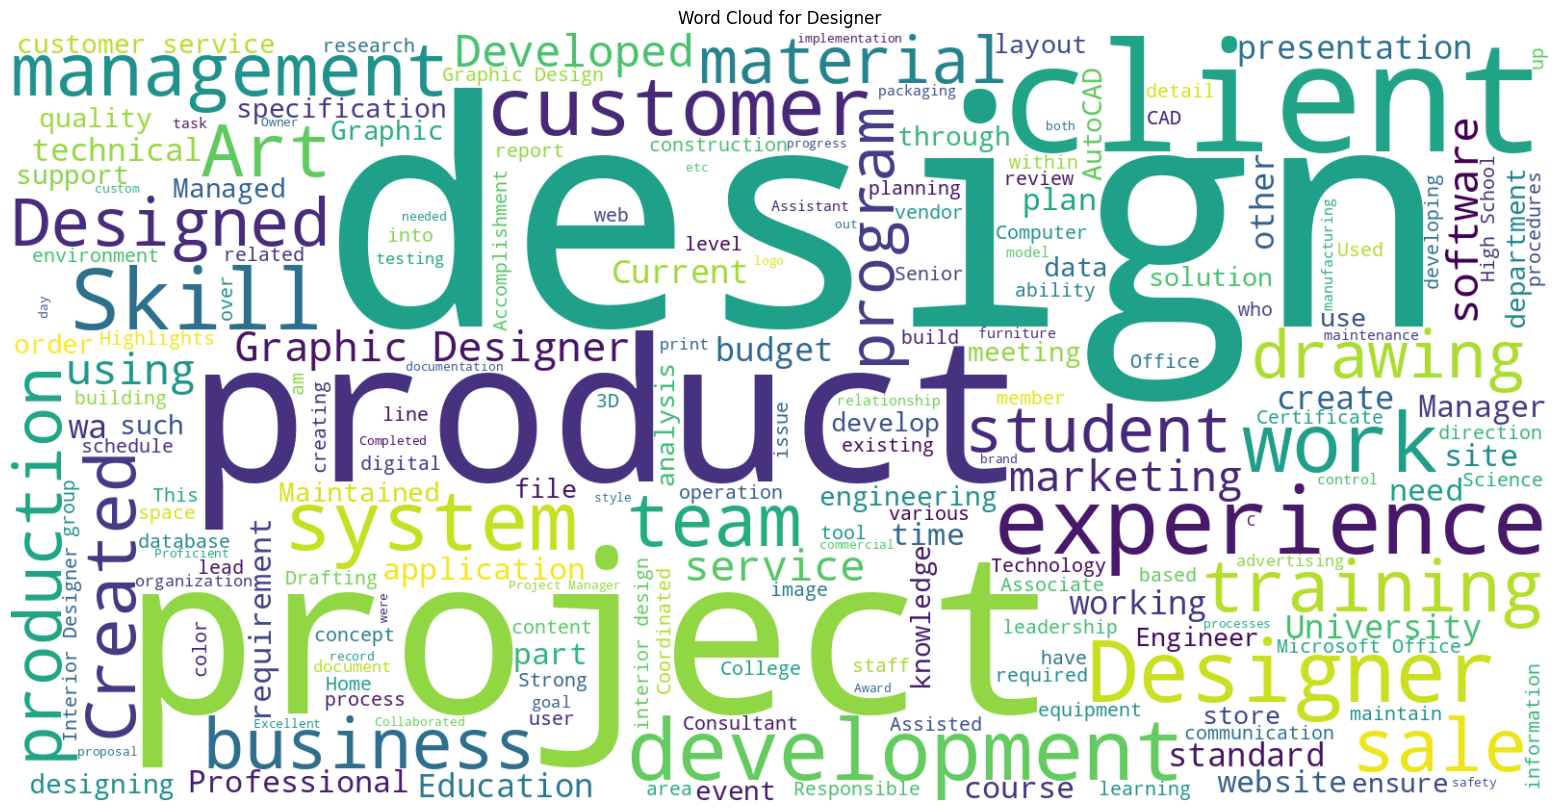

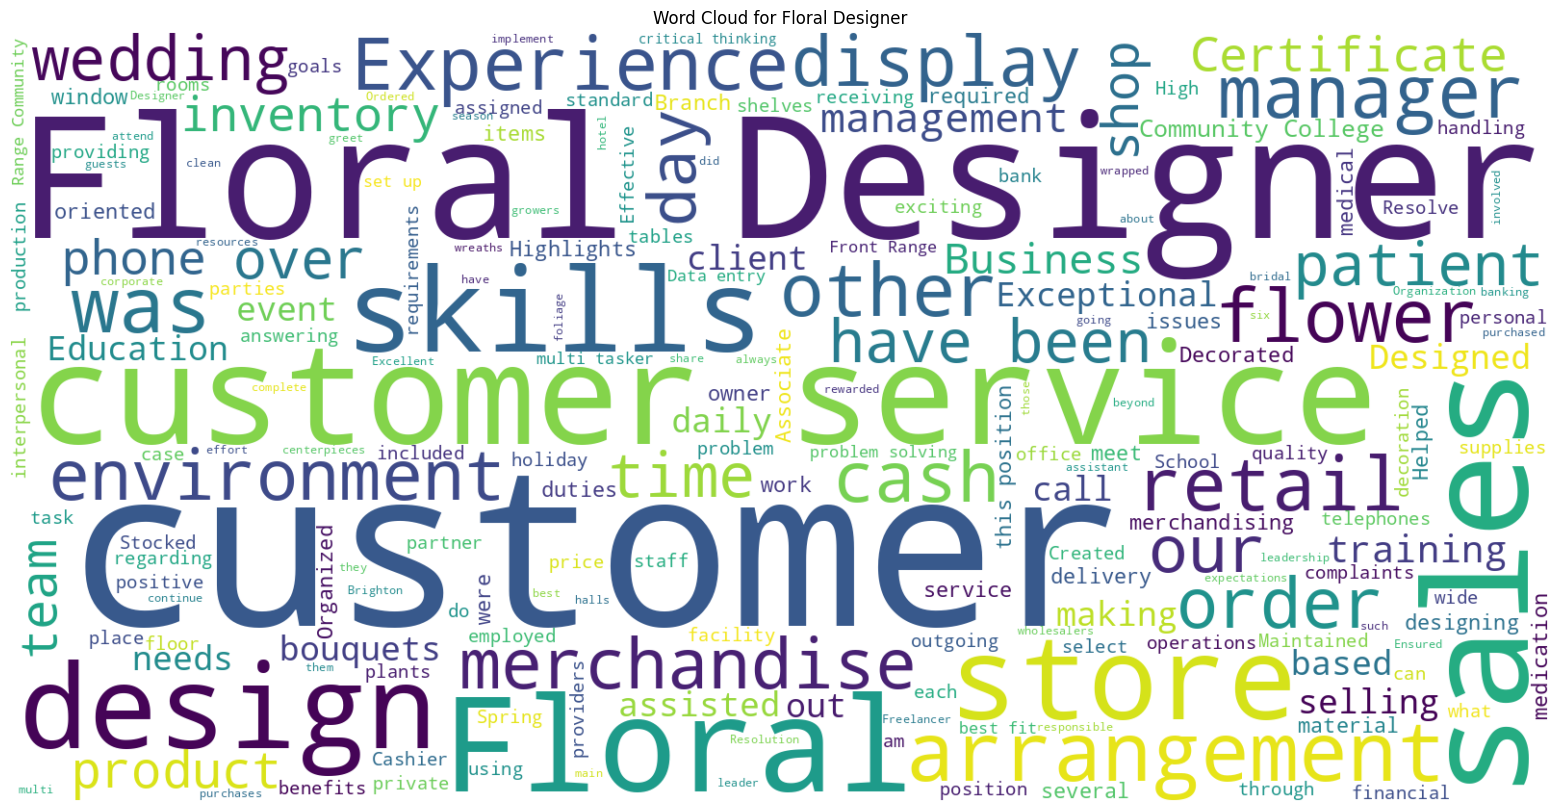

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# this is the main data preprocessing (which will be fed into the CNN model later)
# for this practice, i am going to generate 2 keywords (1 for a specific industry, "designer", and then one for a specific resume within that industry "floral designer")

# Function to generate word cloud and extract keywords
def generate_word_cloud(category, texts):

# Define the stop words (hoping this actually keeps them out... )
    stop_words = (['January', 'February', 'March', 'April', 'May', 'June', 'by', 'gpa', 'well', 'as', 'that', 'for',
                      'on', 'or', 'OR' 'Summary', 'My', 'my', 'SUMMARY', 'Name', 'name', 'July', 'August', 'September', 'October',
                      'November', 'December', 'all', 'new', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
                      '11', '12', 'JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER',
                      'OCTOBER', 'NOVEMBER', 'DECEMBER', 'Employee', 'employee', 'EMPLOYEE', 'I', 'Any','employees', 'EMPLOYEES',
                      'including', 'also', 'months', 'years', 'worked', 'provided', 'streamlined', 'company', 'city', 'which',
                      'job', 'state', 'annual', 'him', 'and', 'it', 'made', 'the', 'from', '1990', '1991', '1992',
                      '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                      '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
                      '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'move', 'someone', 'their', 'be',
                      'every', 'everything', 'a', 'at', 'when', 'but', 'If', 'he', 'His', 'is', 'of', 'an', 'to', 'with',
                      'has', 'in', 'will', 'jan', 'feb', 'mar','apr', 'may', 'jun', 'jul', 'aug','sep', 'oct', 'nov', 'dec','Jan', 'Feb', 'Mar'])

    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1600, height=800).generate(" ".join(texts))
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()  # Displaying the word cloud
    plt.savefig(f'word_cloud_{category}.png')
    plt.close()

# Extracting keywords, sorting them by tf-idf score???

# Loading csv file: resume data
df = pd.read_csv('Resume/Resume.csv')

# Filtering the dataframe for a specific category (ex: designer), generate word cloud
designer_df = df[df['Category'] == 'DESIGNER']
designer_texts = designer_df['Resume_str']
designer_keywords = generate_word_cloud('Designer', designer_texts)

# More filtering for a specific job within that category (here, floral designer), generate word cloud
specific_job_df = designer_df[designer_df['Resume_str'].str.contains("FLORAL DESIGNER")]
specific_job_texts = specific_job_df['Resume_str']
floral_designer_keywords = generate_word_cloud('Floral Designer', specific_job_texts)

# **Starting to work with Convolutional Neural Networks (CNNs)**
# tensorFlow (keras), tokenization, padding, encoding, embedding (??), splitting data into training and testing sets, preparing to actually work with the data

In [11]:
!pip install tensorflow keras scikit-learn
# installing tensorflow, keras, and scikit learn (essentially like toolboxes for ML models)

In [1]:
import pandas as pd # pandas
import numpy as np
import tensorflow as tf # tensorflow - used for tokenizing, padding, etc
from tensorflow.keras.preprocessing.text import Tokenizer # tokenizing is breaking down the resume text (eventually needs to be numerical to be processed by model)
from tensorflow.keras.preprocessing.sequence import pad_sequences # padding = adding to sequence to ensure consistency
from sklearn.model_selection import train_test_split # creating training and testing sets for data
from sklearn.preprocessing import OneHotEncoder # encoding categorical data
from tensorflow.keras.models import Sequential # Sequential class - way to define linear stack of layers in neural network (way to organize architecturre of CNN) - can add diff types of layers (ex: convolutional, pooling, dense)
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM, Dropout # types of layers can be added; embedding (next step after tokenizing)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [12]:
# Tokenzing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Resume_str'])
sequences = tokenizer.texts_to_sequences(df['Resume_str'])
maxlen = max(len(seq) for seq in sequences)
print("Max sequence length:", maxlen)
X = pad_sequences(sequences, maxlen=maxlen) # padding (adding zeros to ensure consistent sequence length )
y = df ['Category'] # target variable

# splitting the data into training, testing and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, df['Category'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)
y_val_encoded = encoder.transform(y_val.values.reshape(-1, 1))

Max sequence length: 5166


In [13]:
# Building the actual CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=maxlen))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(GlobalMaxPooling1D())
model.add(Dense(len(encoder.categories_[0]), activation='softmax')) #this is the output layer

In [16]:
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_val shape:", X_val.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

X_train shape: (1738, 5166)
y_train_encoded shape: (1738, 24)
X_val shape: (373, 5166)
y_val_encoded shape: (373, 24)


In [14]:
# Compile the model (final step before model is ready for use)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5166, 128)         5799168   
                                                                 
 lstm (LSTM)                 (None, 5166, 128)         131584    
                                                                 
 dropout (Dropout)           (None, 5166, 128)         0         
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
Total params: 5933848 (22.64 MB)
Trainable params: 5933848 (22.64 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [15]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))
# this function saves and plot the history of the performance of a Keras model over time, using w/b (inverse relatinship)
# not the best results, but also this is much smaller data
# loss/accuracy - training set, val loss/accu - validation set (quality of model to adapt to new data)

Epoch 1/10
55/55 [==============================] - 820s 15s/step - loss: 3.1499 - accuracy: 0.0639 - val_loss: 3.1151 - val_accuracy: 0.1099
Epoch 2/10
55/55 [==============================] - 764s 14s/step - loss: 3.0309 - accuracy: 0.2365 - val_loss: 2.9555 - val_accuracy: 0.4236
Epoch 3/10
55/55 [==============================] - 758s 14s/step - loss: 2.5203 - accuracy: 0.5322 - val_loss: 2.3609 - val_accuracy: 0.5282
Epoch 4/10
55/55 [==============================] - 758s 14s/step - loss: 1.6485 - accuracy: 0.6910 - val_loss: 1.8332 - val_accuracy: 0.6247
Epoch 5/10
55/55 [==============================] - 768s 14s/step - loss: 1.0027 - accuracy: 0.8113 - val_loss: 1.4536 - val_accuracy: 0.7507
Epoch 6/10
55/55 [==============================] - 750s 14s/step - loss: 0.5933 - accuracy: 0.8993 - val_loss: 1.2785 - val_accuracy: 0.7668
Epoch 7/10
55/55 [==============================] - 758s 14s/step - loss: 0.3528 - accuracy: 0.9545 - val_loss: 1.1022 - val_accuracy: 0.8043
Epoch 

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


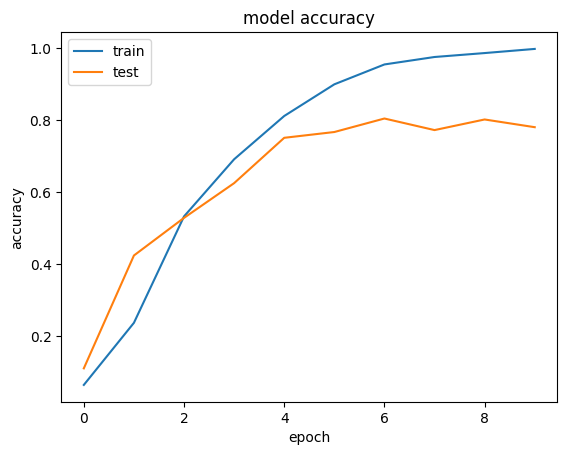

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# could be better (closer together), not bad but the model performs worse on newer data/situations so should be improved

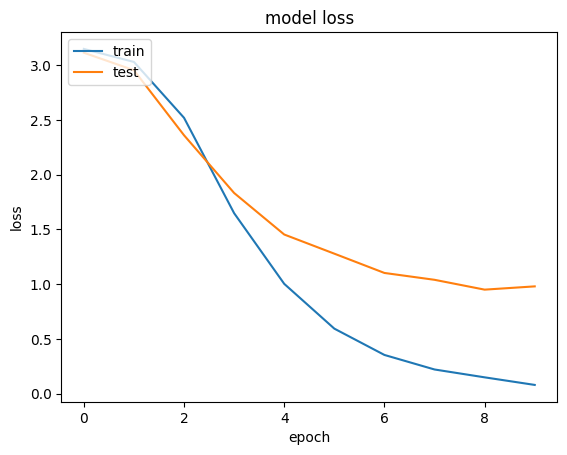

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# same thing here - good general pattern of decrease but need some more correlation for sure

***Once you finish this can apply the same logic to the larger model